1-Basit Doğrusal Regresyon Model

In [240]:
# Temel amaç, bağımlı ve bağımsız değişken arasındaki ilişkiyi ifade eden doğrusal fonksiyonu bulmaktır.
# Tahmin Modeli = y = b_0 +b_1*x_i

1.1-Model

In [241]:
import numpy as np
import pandas as pd

In [242]:
df = pd.read_csv("Advertising.csv")

In [243]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [244]:
df = df.iloc[:,1:len(df)] #unnamed kısmını listeden çıkardık

In [245]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


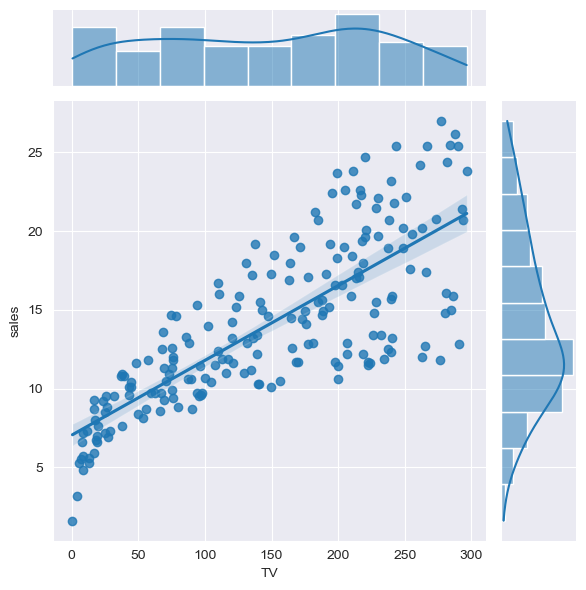

In [247]:
import seaborn as sns
sns.jointplot(x="TV", y="sales", data=df, kind="reg");

In [248]:
from sklearn.linear_model import LinearRegression

In [249]:
x = df[["TV"]]

In [250]:
x.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [251]:
y = df[["sales"]]

In [252]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [253]:
reg = LinearRegression()

In [254]:
model = reg.fit(x, y)

In [255]:
model

LinearRegression()

In [256]:
str(model)

'LinearRegression()'

In [257]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_estimator_type',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',
 'fit_intercept',
 'get_metadata_routing',
 'get_params',
 'intercept_',
 'n_features_in_',
 'n

In [258]:
model.intercept_ # sabit, b_0 değeri

array([7.03259355])

In [259]:
model.coef_ # b_1 değeri

array([[0.04753664]])

In [260]:
# rKare = Bağımlı değişkendeki değişiklğin bağımsız değişkenlerce açıklanma yüzdesidir
model.score(x,y)

0.611875050850071

1.2-Tahmin

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 28.27)

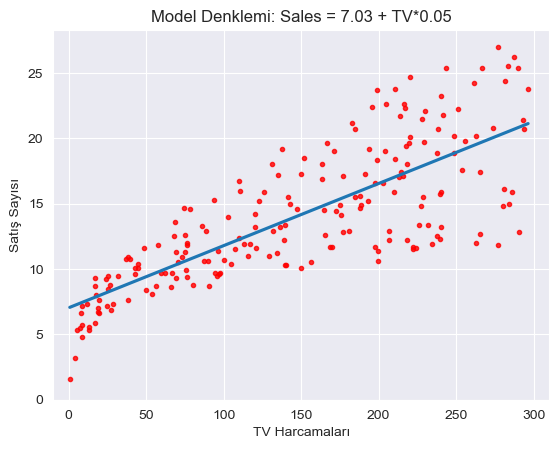

In [262]:
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={"color": "r", "s": 9}) # Ci güven aralığını temsil eder
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0)

In [263]:
modelPredict = model.intercept_ + model.coef_*165

In [264]:
modelPredict

array([[14.87613922]])

In [265]:
model.predict([[165]])

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [266]:
yeniVeri = [[5],[15],[30]]

In [267]:
model.predict(yeniVeri)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.27027675],
       [7.74564316],
       [8.45869276]])

1.3-Artıklar ve Makine Öğrenmesindeki Önemi

In [268]:
# MSE: Hata Kareler Ortalaması
# RMSE: Hata Kareler Ortalamasının Karekökü

In [269]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [270]:
model.predict(x)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [271]:
gercekY = y[0:10]

In [272]:
gercekY

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [273]:
tahminEdilenY = pd.DataFrame(model.predict(x)[0:10])

In [274]:
tahminEdilenY

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218
5,7.446162
6,9.765950
7,12.746498
8,7.441409
9,16.530414


In [275]:
hatalar = pd.concat([gercekY,tahminEdilenY],axis=1)

In [276]:
hatalar.columns =["Gerçek Y","Tahmin Edilen Y"] 

In [277]:
hatalar

,Gerçek Y,Tahmin Edilen Y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [278]:
hatalar["hata"] = hatalar["Gerçek Y"] - hatalar["Tahmin Edilen Y"]

In [279]:
hatalar

,Gerçek Y,Tahmin Edilen Y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [280]:
hatalar["hata_karaler"] = hatalar["hata"]**2

In [281]:
hatalar

,Gerçek Y,Tahmin Edilen Y,hata,hata_karaler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [282]:
np.mean(hatalar["hata_karaler"])

9.290350329638105

2-Çoklu Doğrusal Regresyon

2.1-Model

In [283]:
df = pd.read_csv("Advertising.csv")

In [284]:
df = df.iloc[:,1:len(df)]

In [285]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [286]:
x = df.drop("sales",axis=1)

In [287]:
y = df[["sales"]]

In [288]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [289]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [290]:
# Statsmodel ile model kurma

In [291]:
import statsmodels.api as sm

In [292]:
lm = sm.OLS(y,x)

In [293]:
lm

In [294]:
model = lm.fit() # Modeli eğitiyoruz

In [295]:
model.summary() # Model bilgilerini veriyor

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3566.
Date:                Sun, 25 Feb 2024   Prob (F-statistic):                   2.43e-171
Time:                        18:27:42   Log-Likelihood:                         -423.54
No. Observations:                 200   AIC:                                      853.1
Df Residuals:                     197   BIC:                                      863.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0538      0.001     40.507      0.000       0.051       0.056
radio          0.2222      0.009     23.595      0.000       0.204       0.241
newspaper      0.0168      0.007      2.517      0.013       0.004       0.030
==============================================================================
Omnibus:                        5.982   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                7.039
Skew:                          -0.232   Prob(JB):                       0.0296
Kurtosis:                       3.794   Cond. No.                         12.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [296]:
## scikit learn ile model kurmak

In [297]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [298]:
model = lm.fit(x,y)

In [299]:
model.intercept_

array([2.93888937])

In [300]:
model.coef_

array([[ 0.04576465,  0.18853002, -0.00103749]])

2.2-Tahmin

In [301]:
# EL İLE HESAPLAMA
# Sales = 2.94 + TV*0.04 + radio*0.18 - newspaper*0.001
# 30 birim Tv, 10 birim Radio, 40birim Gazete
Sales = 2.94 + 30*0.04 + 10*0.18 - 40*0.001
Sales

5.8999999999999995

In [302]:
yeniVeri = [[30],[10],[40]]

In [303]:
yeniVeri = pd.DataFrame(yeniVeri).T # T transpoz için kullandık

In [304]:
yeniVeri

,0,1,2
0,30,10,40


In [305]:
model.predict(yeniVeri)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.15562918]])

In [306]:
from sklearn.metrics import mean_squared_error # Model başarısını ölçmek için kullanılır

In [307]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [308]:
model.predict(x)[0:10]

array([[20.52397441],
       [12.33785482],
       [12.30767078],
       [17.59782951],
       [13.18867186],
       [12.47834763],
       [11.72975995],
       [12.12295317],
       [ 3.72734086],
       [12.55084872]])

In [309]:
mse = mean_squared_error(y,model.predict(x)) # sol taraf gerçek değerler sağ taraf tahmin edilen değerler

In [310]:
mse

2.784126314510936

In [311]:
rmse = np.sqrt(mse)

In [312]:
rmse

1.6685701407225697

2.3-Model Tuning

In [313]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [314]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [315]:
# sınama seti
from sklearn.model_selection import train_test_split

In [316]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=1)

In [317]:
x_train.head()

,TV,radio,newspaper
127,80.2,0.0,9.2
105,137.9,46.4,59.0
48,227.2,15.8,49.9
66,31.5,24.6,2.2
54,262.7,28.8,15.9


In [318]:
y_train.head()

,sales
127,8.8
105,19.2
48,14.8
66,9.5
54,20.2


In [319]:
x_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [320]:
y_test.head()

,sales
58,23.8
40,16.6
34,9.5
102,14.8
184,17.6


In [321]:
lm = LinearRegression()

In [322]:
model = lm.fit(x_train, y_train)

In [323]:
model

LinearRegression()

In [324]:
# Eğitim Hatası
np.sqrt(mean_squared_error(y_train, model.predict(x_train)))

1.7441015348540263

In [325]:
# Test Hatası
np.sqrt(mean_squared_error(y_test, model.predict(x_test)))

1.5180919240731634

In [326]:
# K-Katlı cv
from sklearn.model_selection import cross_val_score

In [327]:
cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error') # cv katsayısnı belirler

array([-3.19693201, -2.10440566, -3.61810769, -7.80273436, -2.14630952,
       -3.27924731, -3.07534883, -2.62218671, -1.08148537, -4.09113623])

In [328]:
# cv mse
ortalamaHata = np.mean(-cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error'))

In [329]:
ortalamaHata

3.301789369198178

In [330]:
# cv rmse
ortalamaKareHata = np.sqrt(np.mean(-cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_squared_error')))

In [331]:
ortalamaKareHata

1.8170826533755084

3-RİDGE REGRESYON

In [332]:
# GEREKLİ KÜTÜPHANELER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

3.1-Veri Seti

In [333]:
df = pd.read_csv("Hitters.csv")

In [334]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [336]:
df = df.dropna() #Eksik bilgileri sildik

In [337]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [338]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik verileri nümerik değerlere çevirdik

In [339]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [340]:
y = df["Salary"] # Bağımlı değişkeni y'ye atadık

In [341]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [342]:
x_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64") # Bağımlı değişkeni ve kategorik değişkenleri attık

In [343]:
x_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [344]:
x = pd.concat([x_,dms[["League_N",'Division_W',"NewLeague_N"]]],axis=1) # bağımsız değişkenlerimizle, bağımlı değişkenleri ve dummiesleri bir araya getirdik. 

In [345]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [346]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=42)

In [347]:
x_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [348]:
x_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,0,0,0
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,1,0,1
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,539.0,139.0,5.0,93.0,58.0,69.0,5.0,1469.0,369.0,12.0,247.0,126.0,198.0,462.0,9.0,7.0,0,1,0
282,633.0,210.0,6.0,91.0,56.0,59.0,6.0,3070.0,872.0,19.0,420.0,230.0,274.0,367.0,432.0,16.0,1,1,1
111,325.0,76.0,16.0,33.0,52.0,37.0,5.0,1506.0,351.0,71.0,195.0,219.0,214.0,726.0,87.0,3.0,1,1,0
232,313.0,83.0,9.0,43.0,41.0,30.0,14.0,5885.0,1543.0,104.0,751.0,714.0,535.0,58.0,141.0,23.0,1,1,1


In [349]:
y_train

183     125.000
229    1940.000
286     940.000
102     375.000
153     100.000
         ...   
24      776.667
236     750.000
93      145.000
137     430.000
133      87.500
Name: Salary, Length: 197, dtype: float64

In [350]:
y_test

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
       ...  
122    400.0
282     90.0
111    385.0
232    450.0
51      70.0
Name: Salary, Length: 66, dtype: float64

In [351]:
df.shape

(263, 20)

In [352]:
ridgeModel = Ridge(alpha=5).fit(x_train,y_train) # alpha lamdaya denk geliyor

In [353]:
ridgeModel

Ridge(alpha=5)

In [354]:
ridgeModel.coef_

array([ -1.81040449,   8.87872786,   7.12487047,  -3.31713488,
        -2.01162162,   5.40691525,   7.25828404,  -0.13033385,
        -0.25425913,  -0.71109275,   1.81452   ,   0.77083457,
        -0.6768975 ,   0.26211894,   0.2646614 ,  -0.36947934,
        76.19519054, -90.15523668, -16.00453535])

In [355]:
ridgeModel.intercept_

-3.4251968687162844

In [356]:
lamdalar = 10**np.linspace(10,-2,100)*0.5

In [357]:
lamdalar

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [358]:
ridgeModel = Ridge()
katsayilar = []

for i in lamdalar:
    ridgeModel.set_params(alpha = i)
    ridgeModel.fit(x_train,y_train)
    katsayilar.append(ridgeModel.coef_) 

In [359]:
katsayilar

[array([ 1.08705828e-03,  3.59972026e-04,  5.52181027e-05,  1.92813177e-04,
         1.96696069e-04,  1.59478501e-04,  2.78199599e-05,  1.78978518e-02,
         5.28448603e-03,  6.33684784e-04,  2.78574434e-03,  2.70578331e-03,
         1.95710128e-03,  1.87423190e-03,  1.54040667e-04,  2.97933111e-06,
         2.39984989e-07, -1.51804510e-06,  3.31089982e-07]),
 array([ 1.41677983e-03,  4.69820454e-04,  7.18242293e-05,  2.52218183e-04,
         2.55763476e-04,  2.07728851e-04,  3.41731833e-05,  2.22675231e-02,
         6.58971645e-03,  7.96723486e-04,  3.48283639e-03,  3.38849662e-03,
         2.44474193e-03,  2.46055074e-03,  2.00411447e-04,  4.05879985e-06,
         3.06791363e-07, -2.00697735e-06,  4.22750663e-07]),
 array([ 1.84180994e-03,  6.11797854e-04,  9.31516430e-05,  3.29313865e-04,
         3.31574150e-04,  2.69862282e-04,  4.11993224e-05,  2.73092348e-02,
         8.10613246e-03,  9.90615632e-04,  4.29892819e-03,  4.19154557e-03,
         3.01420413e-03,  3.22598807e-03, 

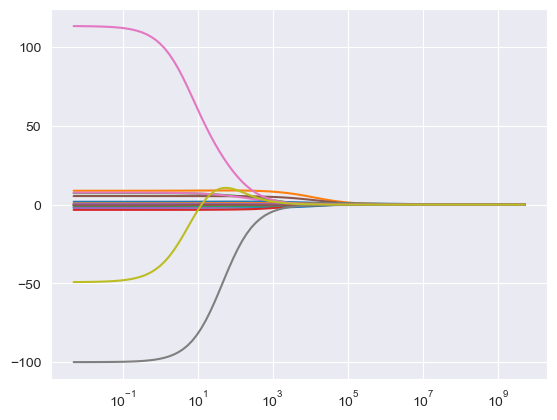

In [360]:
ax = plt.gca()
ax.plot(lamdalar,katsayilar)
ax.set_xscale("log")

3.2-Tahmin

In [361]:
ridgeModel = Ridge().fit(x_train,y_train)

In [362]:
yTahmin = ridgeModel.predict(x_train)

In [363]:
yTahmin[0:10]

array([ 376.25245449,  803.38498121,  496.17669652,  112.69554648,
        427.60020221, 1003.6309402 ,  153.45713944,  361.33880956,
        483.29143665,  916.91439669])

In [364]:
y_train[0:10]

183     125.0
229    1940.0
286     940.0
102     375.0
153     100.0
320     960.0
135      90.0
213     100.0
308     750.0
161     657.0
Name: Salary, dtype: float64

In [365]:
# Train Hatası
rmse = np.sqrt(mean_squared_error(y_train,yTahmin))

In [366]:
rmse

289.34470696006565

In [367]:
ortalamaKareHata = np.sqrt(np.mean(-cross_val_score(ridgeModel, x_train, y_train, cv=10, scoring='neg_mean_squared_error')))

In [368]:
ortalamaKareHata

351.3931585606329

In [369]:
# Test Hatası
yTahmin = ridgeModel.predict(x_test)

In [370]:
RMSE = np.sqrt(mean_squared_error(y_test, yTahmin))

In [371]:
rmse

289.34470696006565

3.3-Model Tuning

In [372]:
ridgeModel = Ridge(1).fit(x_train,y_train)

In [373]:
yTahmin = ridgeModel.predict(x_test)

In [374]:
np.sqrt(mean_squared_error(y_test, yTahmin))

356.8082905730246

In [375]:
lambdalar1 = np.random.randint(0,100,10)

In [376]:
lambdalar1 

array([40, 30, 48, 97,  8, 21, 27, 46, 22, 89])

In [377]:
lambdalar2 = 10**np.linspace(10,-2,100)*0.5

In [378]:
lambdalar2

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [379]:
ridgeCv = RidgeCV(alphas=lambdalar1, scoring="neg_mean_squared_error", cv=10)
ridgeCv.fit(x_train,y_train)

RidgeCV(alphas=array([40, 30, 48, 97,  8, 21, 27, 46, 22, 89]), cv=10,
        scoring='neg_mean_squared_error')

In [380]:
ridgeCv.alpha_

8

In [381]:
# Final Modeli
ridgeTuned = Ridge(alpha= ridgeCv.alpha_).fit(x_train,y_train)

In [382]:
ridgeTuned

Ridge(alpha=8)

In [383]:
yTahmin = ridgeModel.predict(x_test)

In [384]:
yTahmin

array([ 610.65617195,  693.026009  , 1015.18797916,  408.93538433,
        420.8066687 ,  342.03579451,  659.24206436,  447.06500871,
        911.97037648,  647.245175  ,  686.583434  ,  890.24593382,
        226.18707176,  441.614535  ,  267.92008058,  508.9150287 ,
        803.80833843,   44.67259153, 1236.36494415,  319.27803482,
        428.47161008,  746.13915494,  571.82766371,  650.06046955,
        618.57144278,  203.32868858,  898.88810564,  253.94481411,
        428.00138505,   84.95373396,  144.73497819,  128.19533463,
        373.57050545,  461.63869681,  274.01133172,  266.17833459,
       1325.48420514,  105.43741271,  133.94688883,  246.93565593,
         54.93975319,  298.59466534,  586.8827676 ,  400.44947425,
        767.62525395,  684.20156598,  359.35422132,  258.27138434,
        254.49103808,  668.21885022,  750.89774598,  321.95939673,
        773.5695824 ,  188.35424688,  278.41811003,  591.14042866,
        667.01715039,  809.18614133,  159.66790484, 1165.73939

In [385]:
np.sqrt(mean_squared_error(y_test, yTahmin))

356.8082905730246

4- LASSO REGRESYONU

In [498]:
# GEREKLİ KÜTÜPHANELER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV

4.1-Veri Seti

In [459]:
df = pd.read_csv("Hitters.csv")

In [460]:
df.head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
7,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.0,A
8,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.0,N
9,401,92,17,49,66,65,13,5206,1332,253,784,890,866,A,E,0,0,0,1100.0,A


In [461]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [462]:
df = df.dropna() #Eksik bilgileri sildik

In [463]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [464]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]]) # Kategorik verileri nümerik değerlere çevirdik

In [465]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [466]:
y = df["Salary"] # Bağımlı değişkeni y'ye atadık

In [467]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [468]:
x_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64") # Bağımlı değişkeni ve kategorik değişkenleri attık

In [469]:
x_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [470]:
x = pd.concat([x_,dms[["League_N",'Division_W',"NewLeague_N"]]],axis=1) # bağımsız değişkenlerimizle, bağımlı değişkenleri ve dummiesleri bir araya getirdik. 

In [471]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [472]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=42)

In [473]:
x_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [474]:
x_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,0,0,0
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,1,0,1
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,539.0,139.0,5.0,93.0,58.0,69.0,5.0,1469.0,369.0,12.0,247.0,126.0,198.0,462.0,9.0,7.0,0,1,0
282,633.0,210.0,6.0,91.0,56.0,59.0,6.0,3070.0,872.0,19.0,420.0,230.0,274.0,367.0,432.0,16.0,1,1,1
111,325.0,76.0,16.0,33.0,52.0,37.0,5.0,1506.0,351.0,71.0,195.0,219.0,214.0,726.0,87.0,3.0,1,1,0
232,313.0,83.0,9.0,43.0,41.0,30.0,14.0,5885.0,1543.0,104.0,751.0,714.0,535.0,58.0,141.0,23.0,1,1,1


In [475]:
y_test

148    850.0
154    277.5
318    875.0
279    150.0
88     260.0
       ...  
122    400.0
282     90.0
111    385.0
232    450.0
51      70.0
Name: Salary, Length: 66, dtype: float64

In [476]:
y_train

183     125.000
229    1940.000
286     940.000
102     375.000
153     100.000
         ...   
24      776.667
236     750.000
93      145.000
137     430.000
133      87.500
Name: Salary, Length: 197, dtype: float64

In [477]:
df.shape

(263, 20)

In [478]:
lassoModel = Lasso(alpha = 1.0)  
lassoModel.fit(x_train, y_train)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.257e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [479]:
lassoModel.intercept_

-5.587450677336733

In [480]:
lassoModel.coef_

array([-1.74875691e+00,  8.59204135e+00,  6.67993798e+00, -3.06715333e+00,
       -1.91843070e+00,  5.32372890e+00,  8.39184117e+00, -1.63172447e-01,
       -8.22311277e-02, -3.93602861e-01,  1.71118530e+00,  6.55730545e-01,
       -6.48379405e-01,  2.59815358e-01,  2.73041157e-01, -4.41440454e-01,
        8.54474011e+01, -9.59701213e+01, -2.13086605e+01])

In [481]:
# Farklı lambda değerlerine karsılık katsayilar

In [482]:
coefs = []
alphas = np.random.randint(0, 100, 10)

for a in alphas:
    lassoModel.set_params(alpha=a)
    lassoModel.fit(x_train, y_train)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.451e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.063e+04, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(
C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.240e+06, toleranc

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

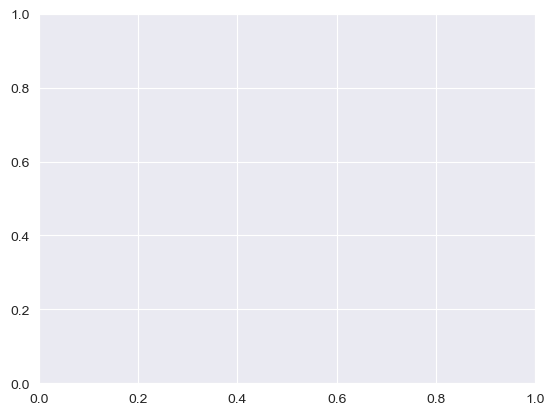

In [483]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

4.2-Tahmin

In [ ]:
lassoModel

In [484]:
lassoModel.predict(x_train)

array([ 300.58274732,  779.84880764,  540.51014643,  118.49284575,
        451.69402813, 1013.31672037,   72.82926264,  275.928728  ,
        394.62594891,  862.61107673, 1610.61614464,  824.46895678,
        901.89874426,  708.4137029 ,  584.64480116,  634.29148615,
       1033.56319701,  158.75681856,  215.56972752,  378.25636567,
        769.47494591,  964.99832326,  465.1334139 ,  326.71409399,
        106.06205131,  798.2195273 ,  546.61762437,  223.79482088,
        378.11317568,  261.63779909,   84.78694444,  535.98584621,
       1017.8554066 ,  208.8365909 ,  427.65164384,  389.17778734,
        449.79482775,  726.95879175,  337.66559372,  253.47930461,
        222.89607303,  307.67893085,  195.05548227,  205.3901275 ,
        232.29845067, 1071.72664671,  412.57499875,  562.18126533,
        233.51879447,  343.44086221,  405.59979777,  501.76627549,
        298.1918732 ,  432.56379053,  568.63689454,  341.36402687,
        542.44212431,  713.30847728,  196.31611529, 1548.22287

In [485]:
lassoModel.predict(x_test)

array([ 557.1272511 ,  561.47794736, 1038.72838233,  336.38700869,
        501.13204094,  289.0253132 ,  577.08304314,  467.57633839,
        906.69816348,  712.16917776,  708.39679328,  937.63144954,
        200.04813206,  353.27818468,  364.45065961,  563.39032569,
        773.46897193,  132.49797592, 1272.30099566,  402.9528711 ,
        449.99688567,  807.14646557,  566.09157469,  584.13197324,
        632.32521523,  239.90022829,  923.14904233,  329.8072909 ,
        342.34166323,  146.79179286,  164.92899546,   63.89182304,
        365.75347931,  389.66641747,  269.71674594,  384.00779825,
       1346.42714385,  114.19756423,   49.68448644,  269.79800673,
        157.86600033,  270.12484305,  695.25056364,  402.62252974,
        897.04540146,  690.41907187,  358.24951788,  407.81283381,
        328.5182716 ,  683.93769731,  693.29421784,  276.32328845,
        779.85406502,  297.88896177,  193.29064205,  534.01161286,
        593.47851444,  765.78901356,  143.06519398, 1173.67530

In [486]:
yTahmin  = lassoModel.predict(x_test)

In [487]:
ortalamaKareHata = np.sqrt(mean_squared_error(y_test, yTahmin))

In [488]:
ortalamaKareHata

357.70155180024483

In [489]:
r2_score(y_test,yTahmin)

0.4089391341615004

4.3-Model Tuning

In [490]:
lassoCvModel = LassoCV(alphas= alphas, cv=10, max_iter = 10000).fit(x_train, y_train)

In [491]:
lassoCvModel.alpha_

99

In [492]:
lassoTuned = Lasso().set_params(alpha=lassoCvModel.alpha_).fit(x_train, y_train)
# Aynı Yöntem
# lassoTuned = Lasso(alpha=lassoCvModel.alpha_).fit(x_train, y_train)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.377e+03, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [493]:
lassoTuned

Lasso(alpha=99)

In [494]:
yTahmin  = lassoModel.predict(x_test)

In [495]:
ortalamaKareHata = np.sqrt(mean_squared_error(y_test, yTahmin))

In [496]:
ortalamaKareHata

357.70155180024483

In [497]:
pd.Series(lassoTuned.coef_, index=x_train.columns)

AtBat         -1.570458
Hits           6.660055
HmRun          0.000000
Runs          -0.000000
RBI            0.000000
Walks          3.643508
Years          0.000000
CAtBat        -0.147146
CHits          0.110086
CHmRun        -0.000000
CRuns          1.220365
CRBI           0.491742
CWalks        -0.356975
PutOuts        0.275471
Assists        0.215021
Errors        -0.000000
League_N       0.000000
Division_W    -0.000000
NewLeague_N    0.000000
dtype: float64

5-ElasticNet Regresyonu

In [499]:
# GEREKLİ KÜTÜPHANELER
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

5.1-Veri Seti

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [505]:
df = df.dropna()  #Eksik bilgileri sildik

In [506]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [507]:
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])  # Kategorik 

In [508]:
dms

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0
...,...,...,...,...,...,...
317,0,1,1,0,0,1
318,1,0,1,0,1,0
319,1,0,0,1,1,0
320,1,0,1,0,1,0


In [509]:
y = df["Salary"]  # Bağımlı değişkeni y'ye atadık


In [510]:
y

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

In [511]:
x_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64") # Bağımlı değişkeni ve kategorik değişkenleri attık

In [512]:
x_

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0


In [513]:
x = pd.concat([x_,dms[["League_N",'Division_W',"NewLeague_N"]]],axis=1) # bağımsız değişkenlerimizle, bağımlı değişkenleri ve dummiesleri bir araya getirdik. 

In [514]:
x

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497.0,127.0,7.0,65.0,48.0,37.0,5.0,2703.0,806.0,32.0,379.0,311.0,138.0,325.0,9.0,3.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
319,475.0,126.0,3.0,61.0,43.0,52.0,6.0,1700.0,433.0,7.0,217.0,93.0,146.0,37.0,113.0,7.0,0,1,0
320,573.0,144.0,9.0,85.0,60.0,78.0,8.0,3198.0,857.0,97.0,470.0,420.0,332.0,1314.0,131.0,12.0,0,0,0


In [515]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [516]:
x_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,629.0,168.0,18.0,73.0,102.0,40.0,18.0,8424.0,2464.0,164.0,1008.0,1072.0,402.0,1067.0,157.0,14.0,0,0,0
236,237.0,52.0,0.0,15.0,25.0,30.0,24.0,14053.0,4256.0,160.0,2165.0,1314.0,1566.0,523.0,43.0,6.0,1,1,1
93,511.0,138.0,25.0,76.0,96.0,61.0,3.0,592.0,164.0,28.0,87.0,110.0,71.0,157.0,7.0,8.0,0,1,0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,211.0,56.0,13.0,0,0,0


In [517]:
x_test

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
148,497.0,136.0,7.0,58.0,38.0,26.0,11.0,3871.0,1066.0,40.0,450.0,367.0,241.0,304.0,347.0,10.0,0,0,0
154,537.0,147.0,23.0,58.0,88.0,47.0,10.0,2744.0,730.0,97.0,302.0,351.0,174.0,92.0,257.0,20.0,1,0,1
318,492.0,136.0,5.0,76.0,50.0,94.0,12.0,5511.0,1511.0,39.0,897.0,451.0,875.0,313.0,381.0,20.0,0,0,0
279,439.0,96.0,0.0,44.0,36.0,65.0,4.0,711.0,148.0,1.0,68.0,56.0,99.0,229.0,406.0,22.0,1,0,1
88,155.0,41.0,12.0,21.0,29.0,22.0,16.0,5409.0,1338.0,181.0,746.0,805.0,875.0,165.0,9.0,1.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,539.0,139.0,5.0,93.0,58.0,69.0,5.0,1469.0,369.0,12.0,247.0,126.0,198.0,462.0,9.0,7.0,0,1,0
282,633.0,210.0,6.0,91.0,56.0,59.0,6.0,3070.0,872.0,19.0,420.0,230.0,274.0,367.0,432.0,16.0,1,1,1
111,325.0,76.0,16.0,33.0,52.0,37.0,5.0,1506.0,351.0,71.0,195.0,219.0,214.0,726.0,87.0,3.0,1,1,0
232,313.0,83.0,9.0,43.0,41.0,30.0,14.0,5885.0,1543.0,104.0,751.0,714.0,535.0,58.0,141.0,23.0,1,1,1


In [518]:
y_train

183     125.000
229    1940.000
286     940.000
102     375.000
153     100.000
         ...   
24      776.667
236     750.000
93      145.000
137     430.000
133      87.500
Name: Salary, Length: 197, dtype: float64

In [519]:
y_train

183     125.000
229    1940.000
286     940.000
102     375.000
153     100.000
         ...   
24      776.667
236     750.000
93      145.000
137     430.000
133      87.500
Name: Salary, Length: 197, dtype: float64

In [520]:
enetModel = ElasticNet().fit(x_train,y_train)

C:\Users\arda_\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [521]:
enetModel.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [522]:
enetModel.intercept_

-6.46595560211324

5.2-Tahmin

In [535]:
enetModel.predict(x_train)

array([ 325.74706292,  776.06632333,  522.86508419,  107.64091955,
        449.03139566,  997.76095723,   99.78828622,  311.33763086,
        418.50335021,  879.9502608 , 1628.05423879,  831.63172575,
        909.34196881,  715.67274292,  601.33595953,  657.40417507,
       1068.2110763 ,  149.6849625 ,  190.40513329,  385.31235163,
        752.37991572, 1022.76166475,  486.94874949,  349.7945189 ,
         69.28225147,  783.98489255,  551.11613877,  205.84644387,
        367.25234577,  303.22135065,   98.44933333,  533.19866378,
       1000.16419322,  245.20490159,  448.10920305,  401.93188524,
        457.71559572,  713.00914559,  333.18157434,  235.45584771,
        210.52615243,  309.20890759,  190.6560382 ,  183.01443111,
        238.19688018, 1080.44877923,  380.19569305,  551.45922356,
        278.3820838 ,  338.53829531,  427.9529666 ,  476.71228336,
        297.09609267,  435.8113557 ,  592.18850471,  320.60291497,
        510.97484699,  698.77992314,  218.04297483, 1535.95190

In [526]:
enetModel.predict(x_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [527]:
yTahmin = enetModel.predict(x_test)

In [528]:
yTahmin

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [530]:
ortalamaKareHata=  np.sqrt(mean_squared_error(y_test, yTahmin))

In [531]:
ortalamaKareHata

357.1676548181246

In [534]:
r2_score(y_test,yTahmin)

0.41070222469326867

5.3-Model Tuning

In [536]:
enetCvModel = ElasticNetCV(cv=10).fit(x_train,y_train)

In [537]:
enetCvModel

ElasticNetCV(cv=10)

In [538]:
enetCvModel.alpha_

5230.764736479864

In [539]:
enetCvModel.intercept_

-38.51940558394301

In [540]:
enetCvModel.coef_

array([ 0.62845434,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.09788752,  0.        ,
        0.27265769,  0.19270075,  0.00758665,  0.3106529 ,  0.        ,
       -0.        ,  0.        , -0.        ,  0.        ])

5.4 Final Model

In [542]:
enetTuned = ElasticNet(alpha = enetCvModel.alpha_).fit(x_train,y_train)

In [543]:
enetTuned

ElasticNet(alpha=5230.764736479864)

In [544]:
yTahmin = enetTuned.predict(x_test)

In [545]:
np.sqrt(mean_squared_error(y_test, yTahmin))

394.1528056321879

In [546]:
?ElasticNet